In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

Создание DataFrame

База данных о жилищном фонде в Бостоне основана на информации, собранной Службой переписи населения США о жилищном фонде в районе Бостона, Массачусетс.<br>
 Ниже приведены столбцы базы данных:

- ***CRIM*** - уровень преступности на душу населения в разбивке по городам
- ***ZN*** - доля земель под жилую застройку, разделенных на участки площадью более 25 000 кв.футов.
- ***INDUS*** - доля акров, не связанных с розничной торговлей, в городе.
- ***CHAS*** - Фиктивная переменная ЧЕС - Чарльз-Ривер (1, если участок граничит с рекой; 0 в противном случае).
- ***NOX*** - концентрация оксидов азота (частей на 10 миллионов)
- ***RM*** - среднее количество комнат в доме
- ***AGE*** - доля жилых помещений, построенных владельцами до 1940 года.
- ***DIS*** - взвешенные расстояния до пяти бостонских центров занятости
- ***RAD*** - индекс доступности радиальных автомагистралей
- ***НАЛОГ*** - полная стоимость недвижимости -ставка налога на 10 000 долларов США
- ***PTRATIO*** - соотношение учеников и учителей по городам
- ***B*** - 1000(Bk - 0,63)^2, где Bk - доля чернокожих в населенном пункте
- ***LSTAT*** - процент более низкого статуса населения
- ***MEDV*** - Средняя стоимость домов, занимаемых владельцами, в 1000 долларах

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
DF=pd.read_csv("C:\\Users\\kiril\\Downloads\\housing (1).csv",header=None,delimiter=r"\s+",names=column_names)
print(DF)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [3]:
print(f'Размерность DF : {DF.shape}') #определние размерности DataFrame

Размерность DF : (506, 14)


Заметим,что в DF 12 столбцов типа float и 2 типа int. Также нет пропущенных значений.

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
DF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- count: Общее количество ненулевых записей в каждом столбце.
- mean: среднее значение значений в столбце.
- std: Стандартное отклонение, показывающее степень разброса значений.
- min: Минимальное значение в столбце.
- 25%: 25-й процентиль (Q1), который означает, что 25% точек данных меньше этого значения.
- 50%: Среднее значение (50-й процентиль), при котором половина точек данных ниже этого значения.
- 75%: 75-й процентиль (Q3) означает, что 75% точек данных находятся ниже этого значения.
- max: Максимальное значение в столбце.

In [6]:
DF.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

DF не содержит дубликатов.


In [7]:
for column_name in DF.columns:
    q1 = DF[column_name].quantile(0.25)
    q3 = DF[column_name].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    outliers = DF[(DF[column_name] < lower_bound) | (DF[column_name] > upper_bound)]
    
    print(f"Столбец '{column_name}': {len(outliers)} выбросов ({len(outliers)/len(DF)*100:.2f}%)")

Столбец 'CRIM': 66 выбросов (13.04%)
Столбец 'ZN': 68 выбросов (13.44%)
Столбец 'INDUS': 0 выбросов (0.00%)
Столбец 'CHAS': 35 выбросов (6.92%)
Столбец 'NOX': 0 выбросов (0.00%)
Столбец 'RM': 30 выбросов (5.93%)
Столбец 'AGE': 0 выбросов (0.00%)
Столбец 'DIS': 5 выбросов (0.99%)
Столбец 'RAD': 0 выбросов (0.00%)
Столбец 'TAX': 0 выбросов (0.00%)
Столбец 'PTRATIO': 15 выбросов (2.96%)
Столбец 'B': 77 выбросов (15.22%)
Столбец 'LSTAT': 7 выбросов (1.38%)
Столбец 'MEDV': 40 выбросов (7.91%)


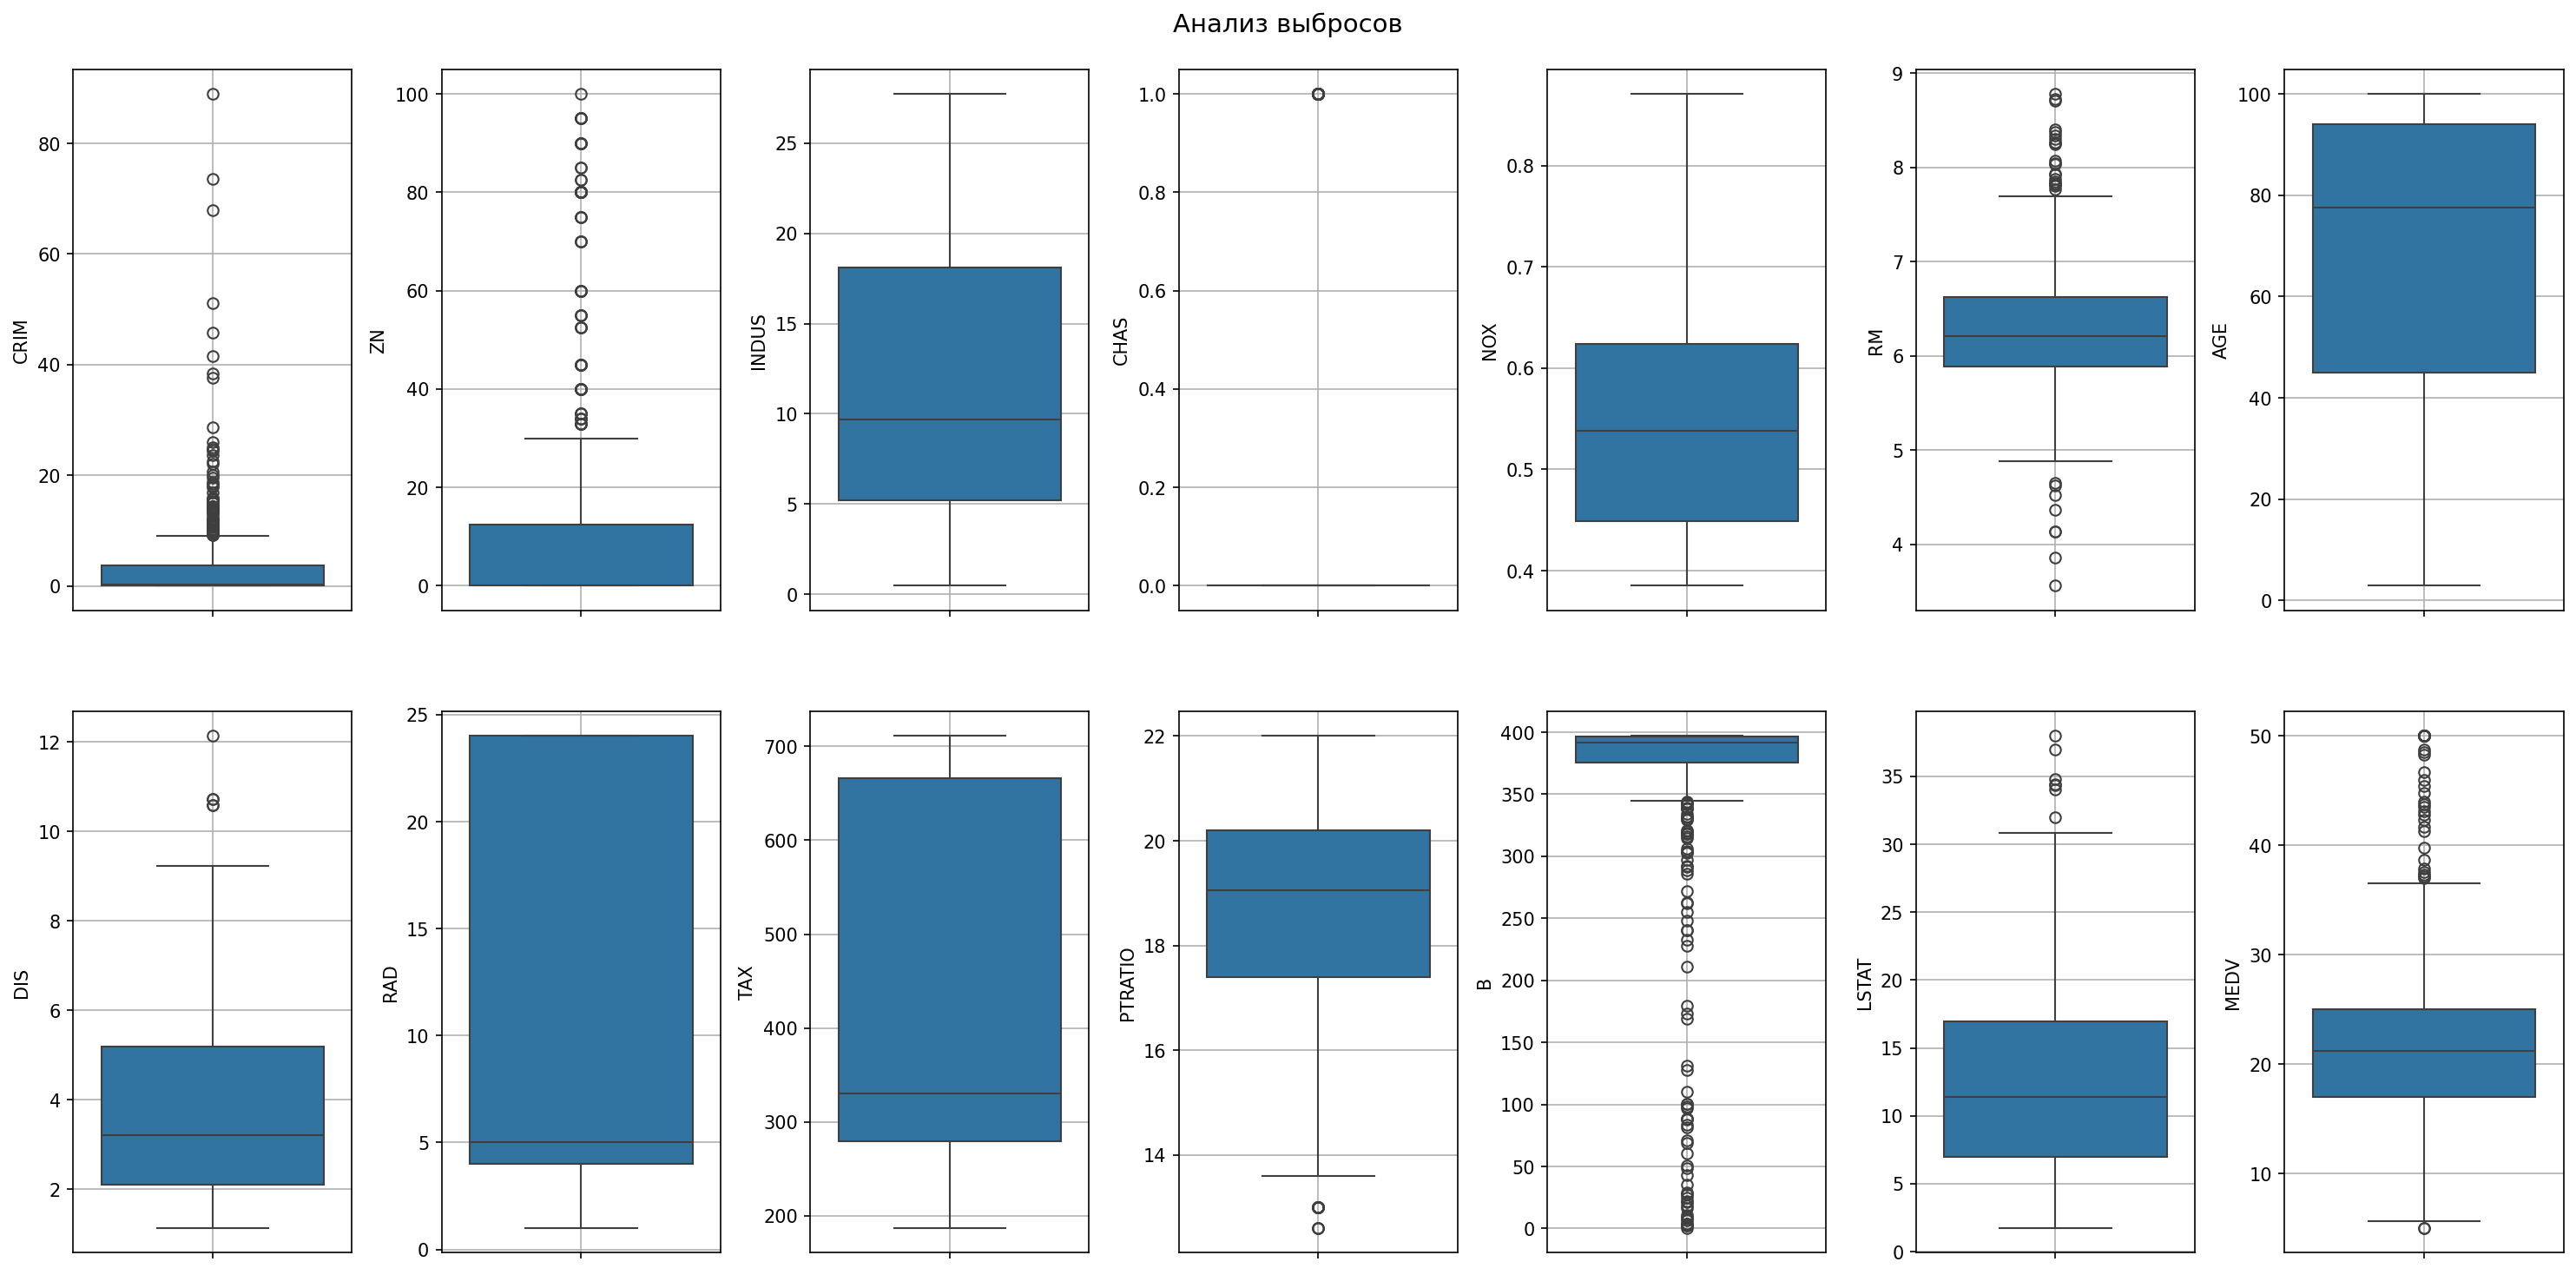

In [8]:
fig,ax=plt.subplots(nrows=2,ncols=7,figsize=(20,10),dpi=150)
ax=ax.flatten()
index=0

for column_name in DF.columns:
    sns.boxplot(y=column_name,data=DF,ax=ax[index])
    ax[index].grid(True)
    index+=1
fig.suptitle("Анализ выбросов",fontsize=14)
plt.tight_layout(pad=1.5, w_pad=1, h_pad=5.0)

**1) - CRIM** Много выбросов сверху.Аномалия в **~ 80%**
<br></br>
**2) - ZN** Выбросы выше **40**
<br></br>
**3) - RM** Точки **~ 9**
<br></br>
**4) - DIS** Выбросы выше **10** и ниже **2**
<br></br>
**5) - PTRATIO** Значения ниже **14**
<br></br>
**6) - LSTAT** Точки выше **30**
<br></br>
**7) - MEDV** Точки выше **40 000$**

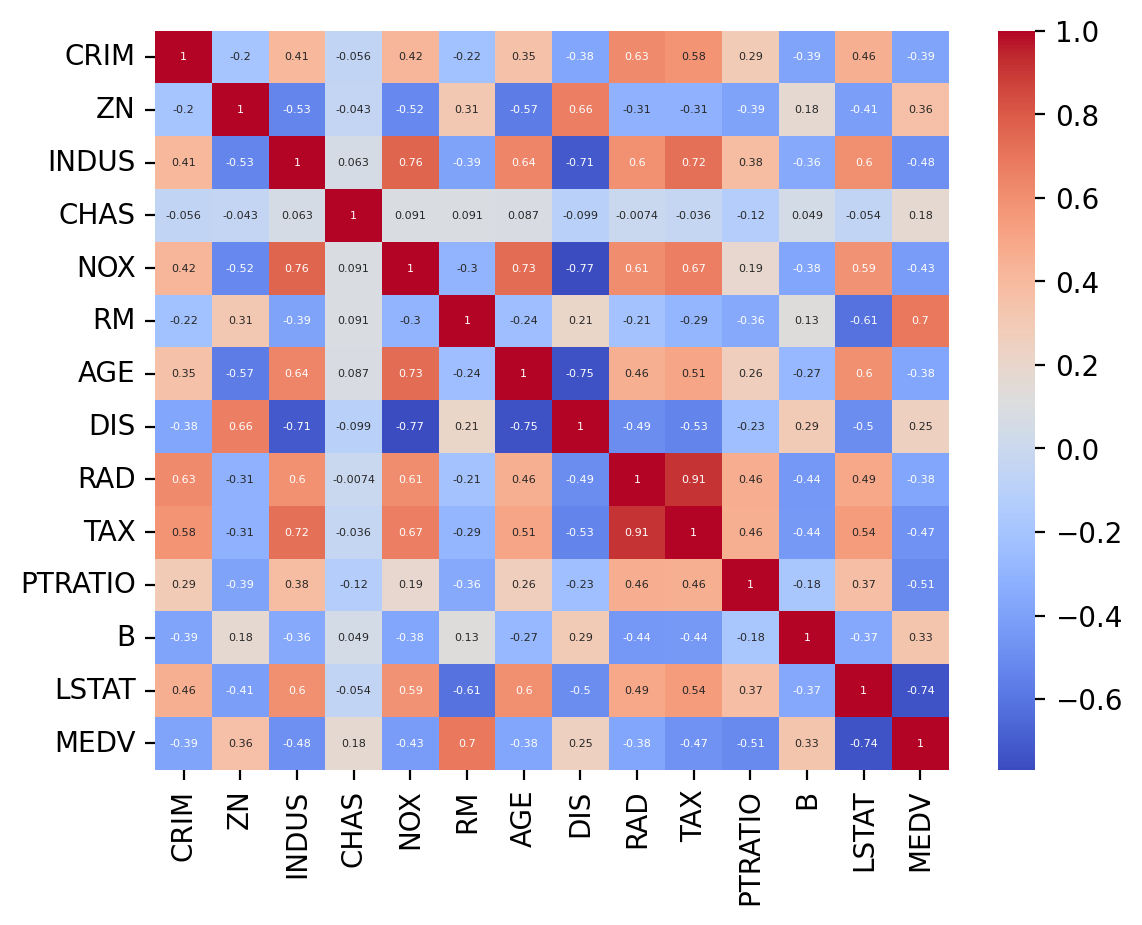

In [9]:
plt.figure(dpi=200)
sns.heatmap(DF.corr(),annot=True,annot_kws={'size':4},cmap='coolwarm')
plt.show()

Корреляция:
 - чем выше **_LSTAT_**(процент бедного населения) ,тем ниже **_MEDV_**(средняя цена в 1000$)   **|**  **corr=-0.71**
 - чем выше **_RM_**(среднее число комнат) ,тем выше выше **_MEDV_**(средняя цена в 1000$)  **|**  **corr=0.7**
<br><br>
 - чем выше **RAD**(индекс доступности магистралей) ,тем выше **TAX**(налог)    **|**  **corr=0.91**
 <br><br>
 - чем выше **NOX**(концентрация оксидов азота (частей на 10 миллионов)) ,тем ниже **DIS**(Взвешенные расстояния до пяти бостонских центров занятости)  **|**  **corr=-0.77**
 - чем выше **INDUS**(доля акров, не связанных с розничной торговлей, в городе) ,тем выше **NOX**(концентрация оксидов азота (частей на 10 миллионов))   **|**  **corr=0.76** 

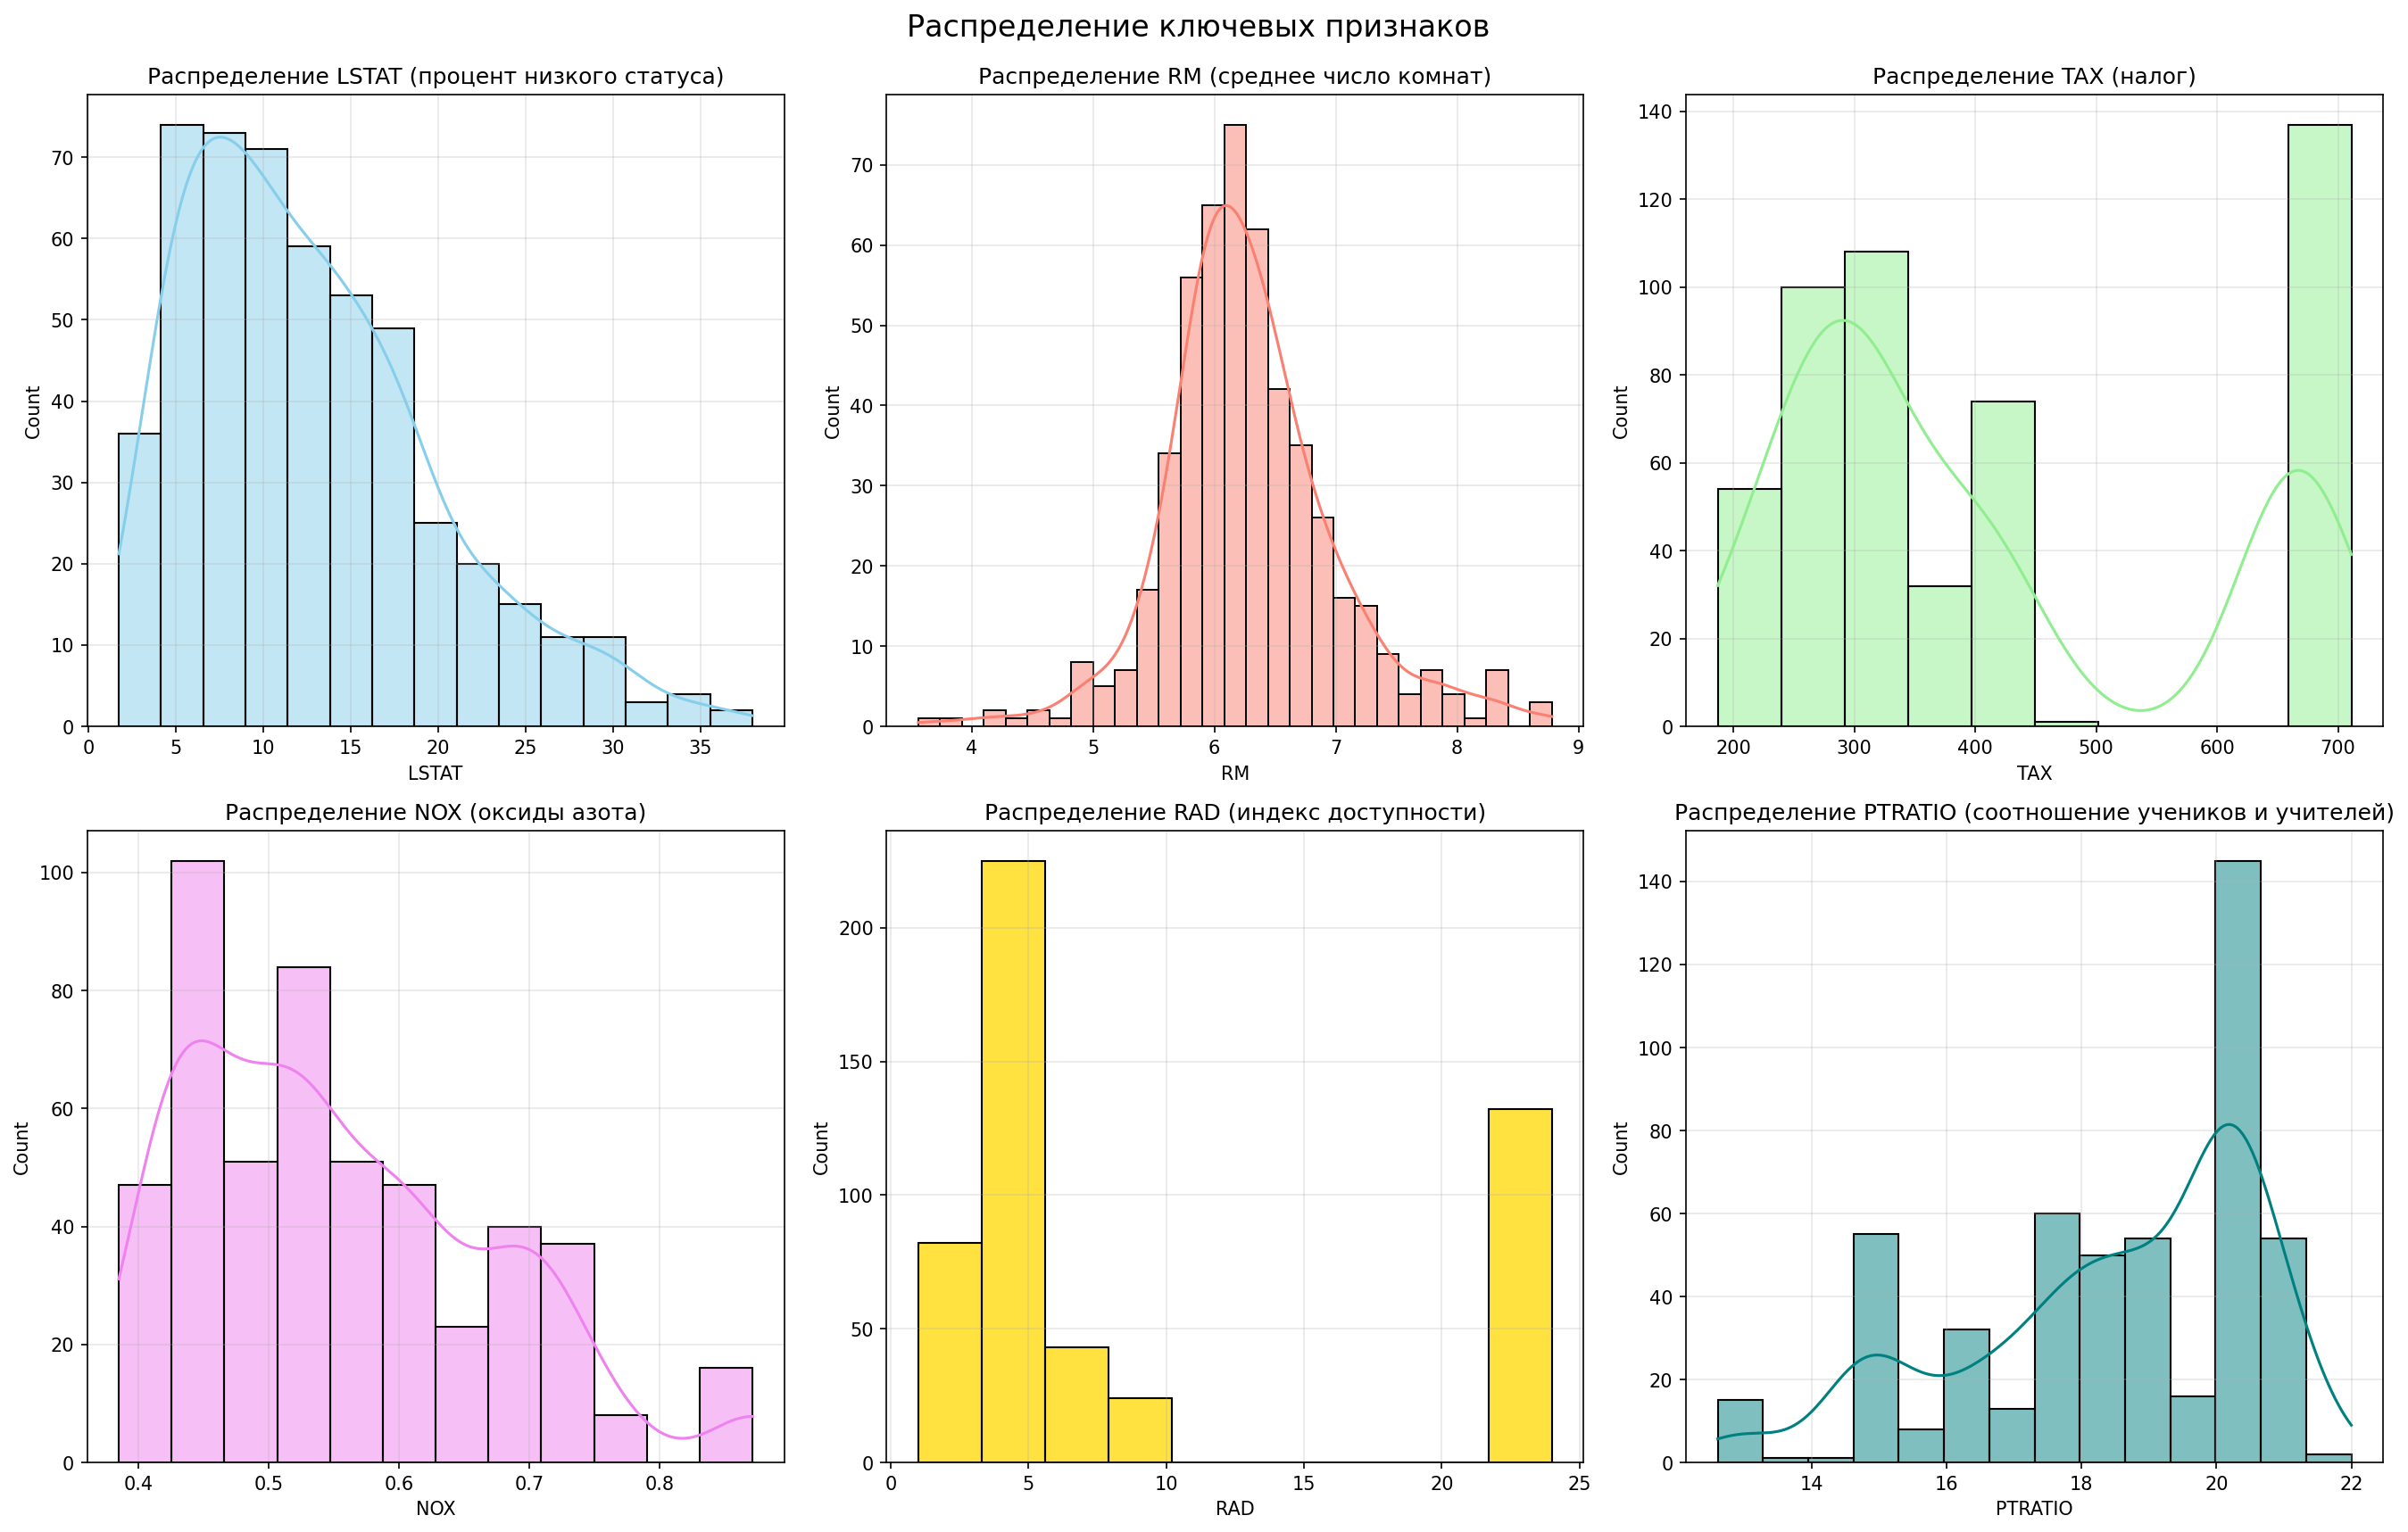

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=150)
fig.suptitle('Распределение ключевых признаков', fontsize=16, y=0.95)

sns.histplot(DF['LSTAT'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Распределение LSTAT (процент низкого статуса)')
axes[0, 0].grid(True, alpha=0.3)

sns.histplot(DF['RM'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Распределение RM (среднее число комнат)')
axes[0, 1].grid(True, alpha=0.3)

sns.histplot(DF['TAX'], kde=True, ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Распределение TAX (налог)')
axes[0, 2].grid(True, alpha=0.3)

sns.histplot(DF['NOX'], kde=True, ax=axes[1, 0], color='violet')
axes[1, 0].set_title('Распределение NOX (оксиды азота)')
axes[1, 0].grid(True, alpha=0.3)

sns.histplot(DF['RAD'], kde=False, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Распределение RAD (индекс доступности)')
axes[1, 1].grid(True, alpha=0.3)

sns.histplot(DF['PTRATIO'], kde=True, ax=axes[1, 2], color='teal')
axes[1, 2].set_title('Распределение PTRATIO (соотношение учеников и учителей)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**1) - LSTAT** Большинство районов имеют **~ 4-22%** низкого статуса насления
<br></br>
**2) - RM** Большинство домов содержат **от 5 до 7** комнат
<br></br>
**3) - TAX** Основная масса налогов находитяся в диапозонах : **~ 250 - 350** , **~ 400-450** , **~ 650 - 710**
<br></br>
**4) - NOX** Два пика : **~ 0.42 - 0.47** и **~ 0.51 - 0.54 **
<br></br>
**5) - RAD** Ассиметрия графика : **4-5**
<br></br>
**6) - PTRATIO** Правостореннее распредление с пиком в **~ 20 - 21**

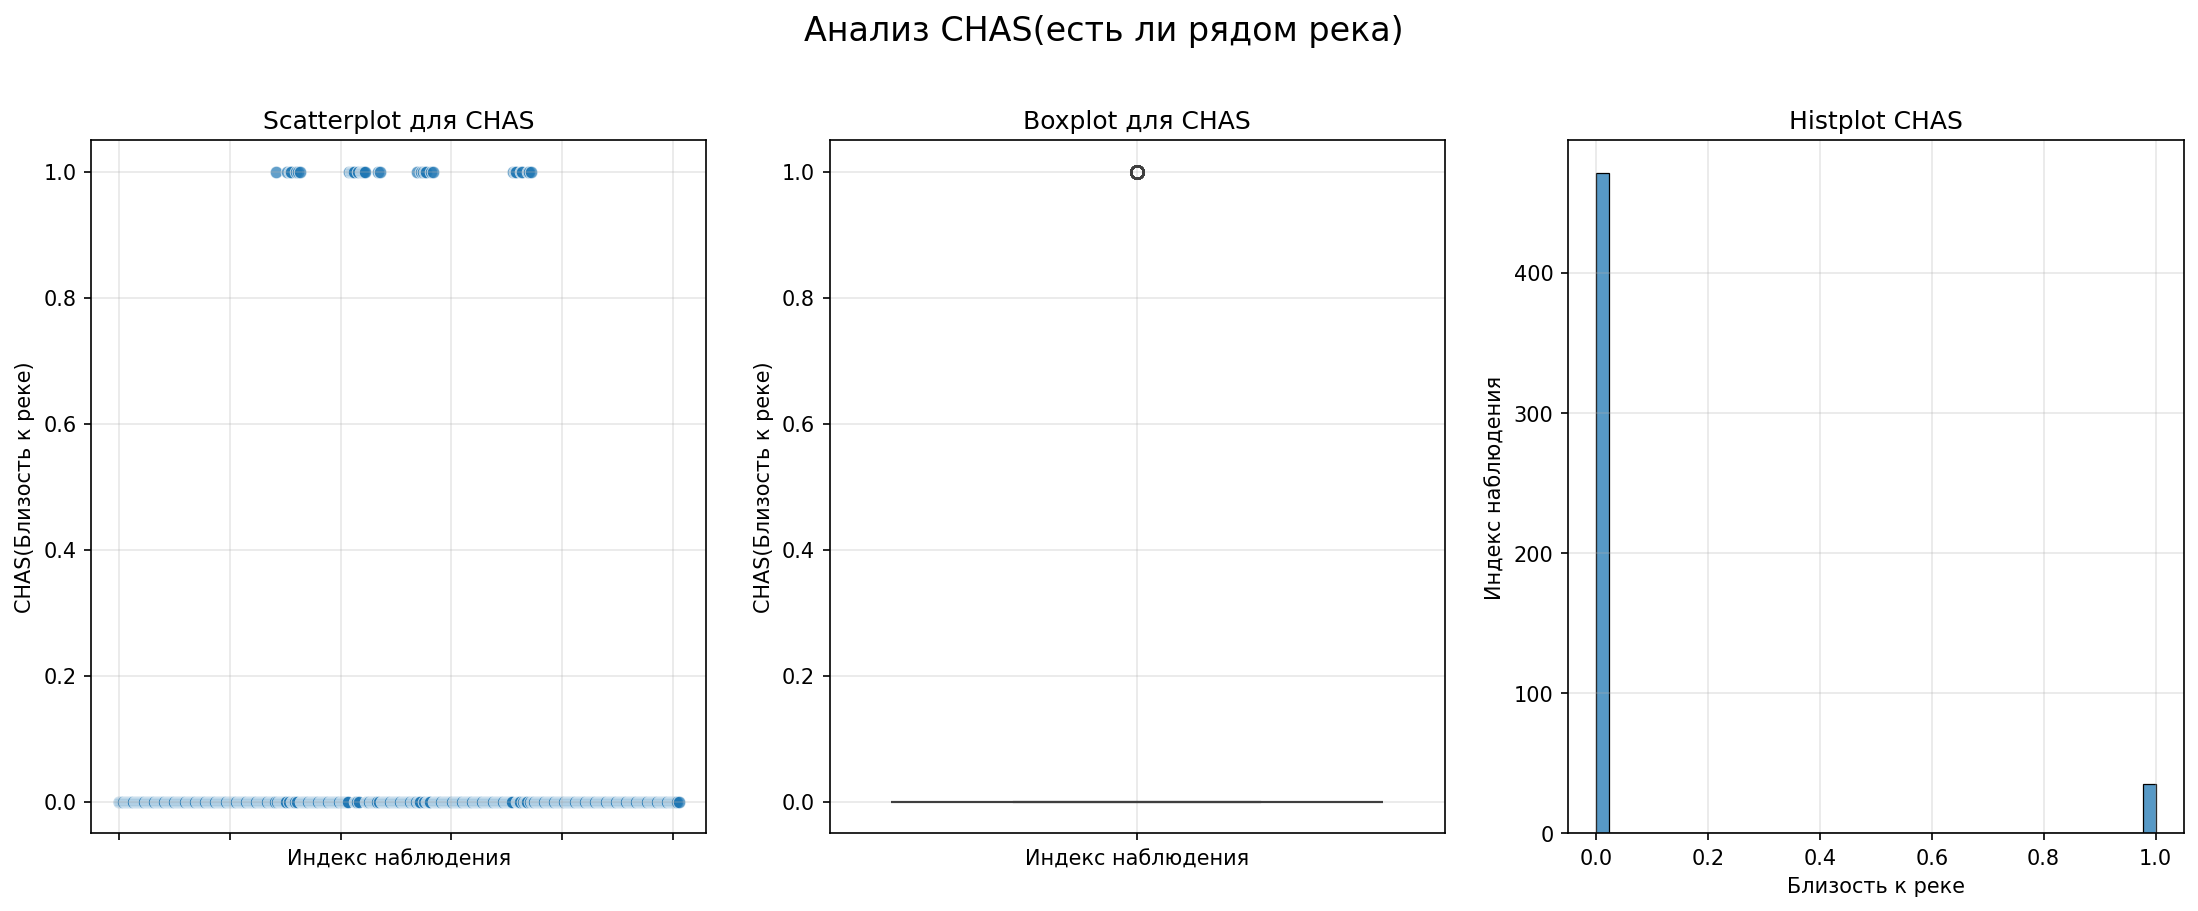

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6),dpi=150)

fig.suptitle('Анализ CHAS(есть ли рядом река)',fontsize=16,y=1.02)

sns.scatterplot(data=DF['CHAS'],alpha=0.7,ax=ax[0])
ax[0].set_title('Scatterplot для CHAS')
ax[0].set_ylabel('CHAS(Близость к реке)')
ax[0].set_xlabel('Индекс наблюдения')
ax[0].tick_params(axis='x', which='both', labelbottom=False)  # Убираем цифры снизу
ax[0].grid(True, alpha=0.3)

sns.boxplot(data=DF['CHAS'],ax=ax[1])
ax[1].set_title('Boxplot для CHAS')
ax[1].set_ylabel('CHAS(Близость к реке)')
ax[1].set_xlabel('Индекс наблюдения')
ax[1].tick_params(axis='x', which='both', labelbottom=False)  # Убираем цифры снизу
ax[1].grid(True, alpha=0.3)

sns.histplot(DF['CHAS'], ax=ax[2])
ax[2].set_title('Histplot CHAS')
ax[2].set_xlabel('Близость к реке')
ax[2].set_ylabel('Индекс наблюдения')
ax[2].grid(True, alpha=0.3)


- На графиках видно, что ***CHAS*** является булевой переменной.
- Также из матрицы корреляции заметно, что этот признак сильнне влияет на ***MEDV*** ( <i>-0.099 < corr < 0.091 )

<div style="font-size: 18px; text-align: ritgh; padding: 20px;">
  <strong>Визуализация распределения целевой переменной <em>MEDV</em></strong><br>
  <span style="font-size: 16px;">(средняя цена дома)</span>
</div>
Для комплексного анализа распределения переменной ***MEDV*** построим три графика в одном ряду:

1. **Scatterplot** — показывает значения ***MEDV*** в порядке их следования в данных.
2. **Boxplot** — помогает выявить выбросы, медиану и общую асимметрию распределения.
3. **Гистограмма с KDE** — отображает плотность значений и позволяет увидеть основные скопления (моды).

Эти графики вместе дают полное представление о том, как распределены цены на дома: где сосредоточено большинство наблюдений, есть ли аномалии и насколько распределение симметрично.

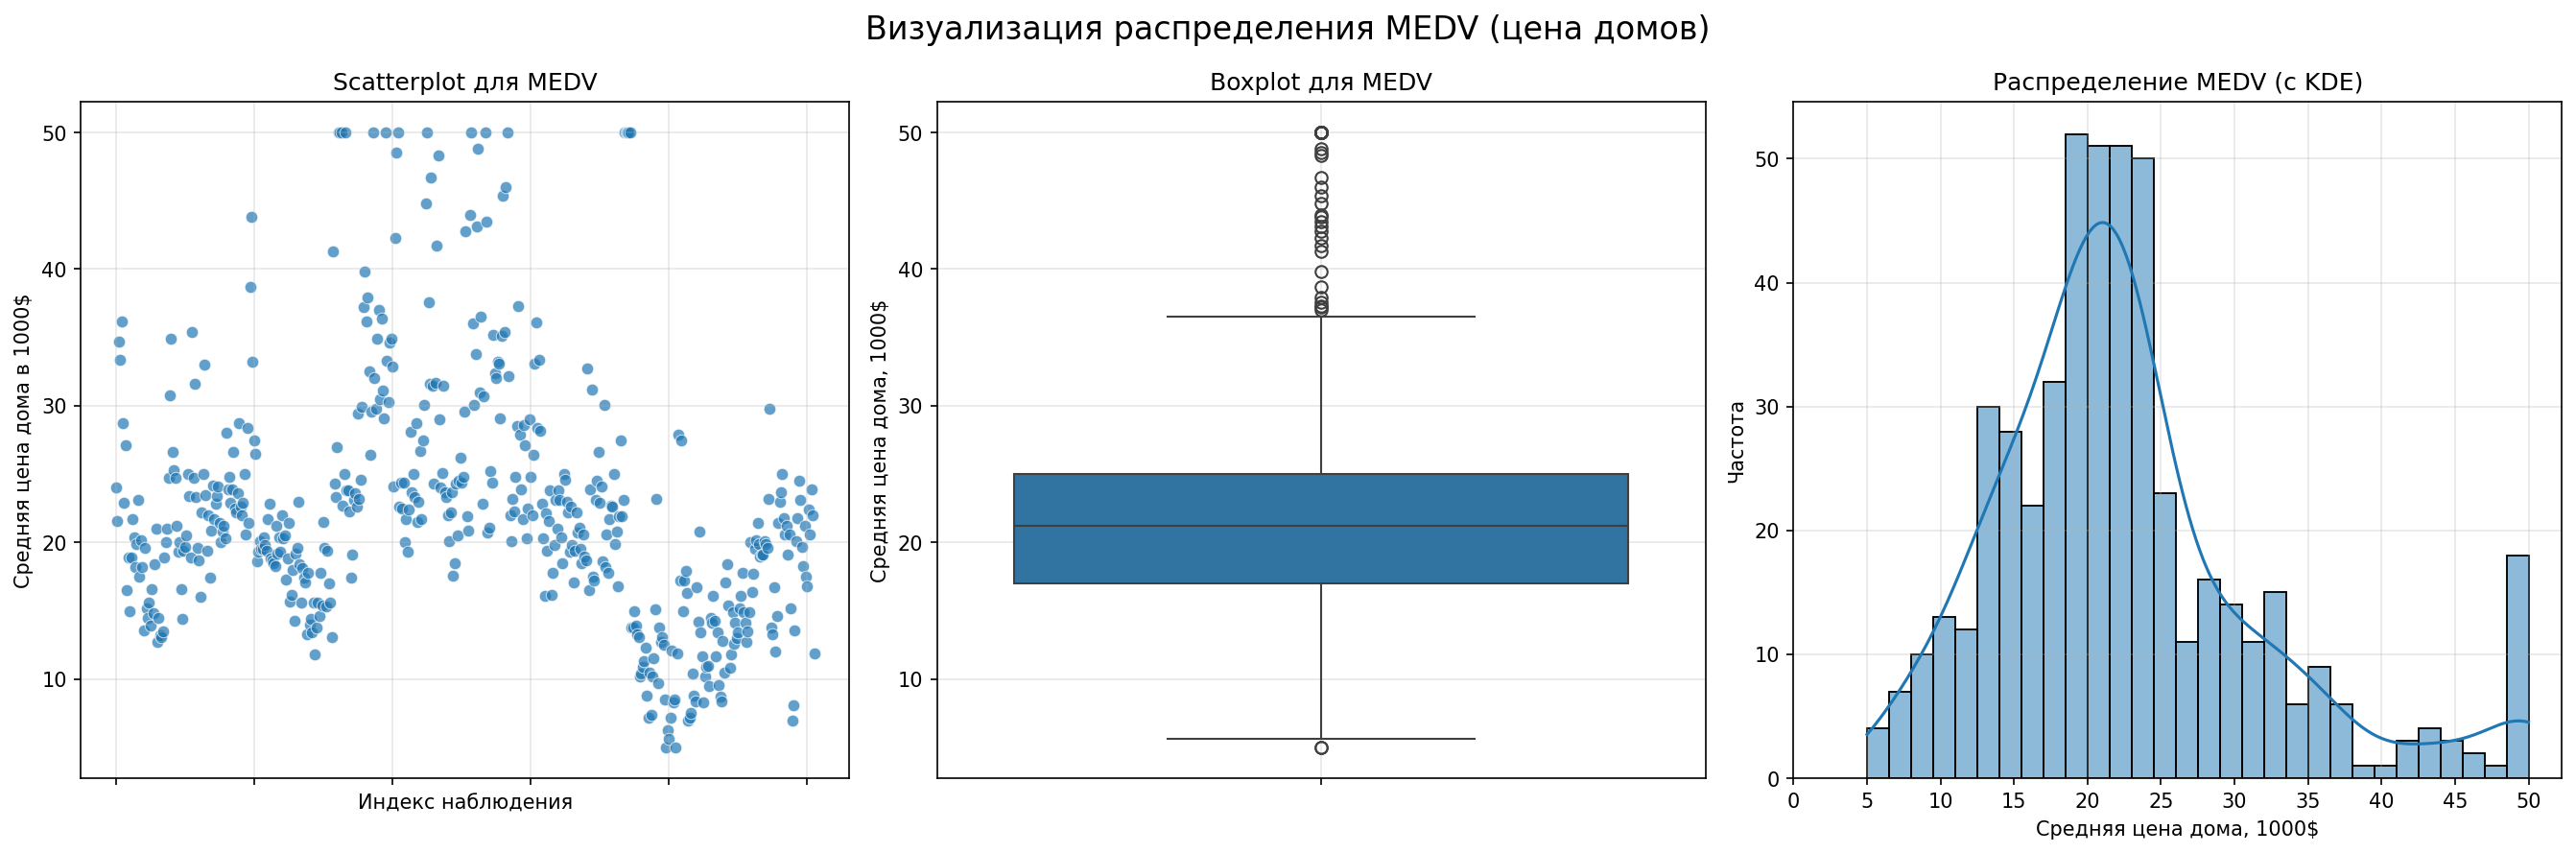

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6),dpi=150)

fig.suptitle('Визуализация распределения MEDV (цена домов)', fontsize=16, y=0.98)

sns.scatterplot(data=DF['MEDV'], alpha=0.7, ax=axes[0])
axes[0].set_title('Scatterplot для MEDV')
axes[0].set_ylabel('Средняя цена дома в 1000$')
axes[0].set_xlabel('Индекс наблюдения')
axes[0].tick_params(axis='x', which='both', labelbottom=False)  # Убираем цифры снизу
axes[0].grid(True, alpha=0.3)

sns.boxplot(y=DF['MEDV'], ax=axes[1])
axes[1].set_title('Boxplot для MEDV')
axes[1].set_ylabel('Средняя цена дома, 1000$')
axes[1].set_xlabel('')
axes[1].grid(True, alpha=0.3)

sns.histplot(DF['MEDV'], kde=True, bins=30, ax=axes[2])
axes[2].set_title('Распределение MEDV (с KDE)')
axes[2].set_xlabel('Средняя цена дома, 1000$')
axes[2].set_ylabel('Частота')
axes[2].set_xticks(range(0, 51, 5))
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**На графиках видно**,
- что **медианная цена** равнаяется **~ 21 000 $** 
- что дома в диапозоне **17 000$ - 25 000$** встречаются чаще
- на **scatterplot** и **boxplot** заметны точки выше **40 000$***. Данные точки являются **выбросами** .

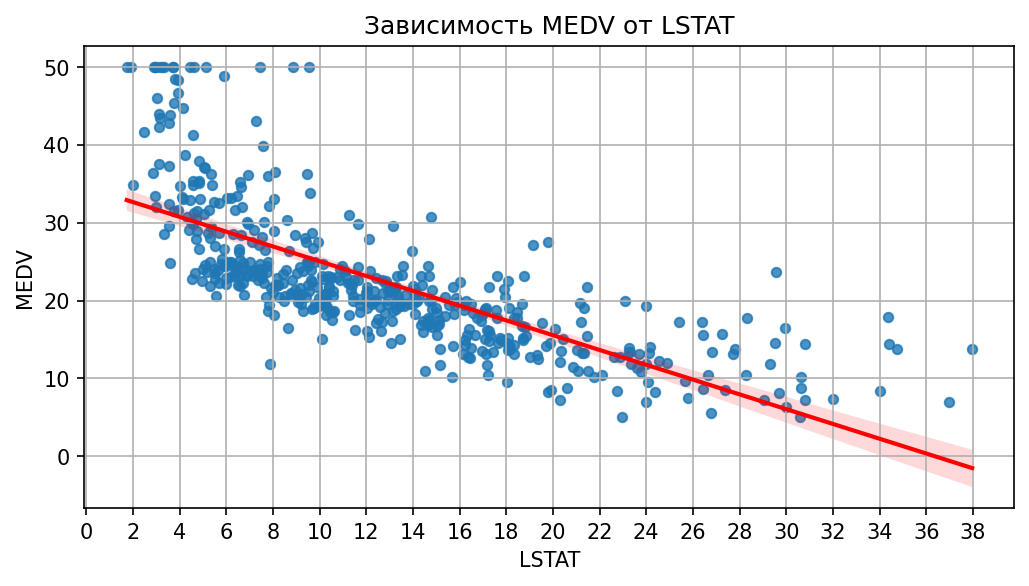

In [13]:
plt.figure(figsize=(8, 4), dpi=150) 
sns.regplot(data=DF, x='LSTAT', y='MEDV',scatter_kws={'s':20},line_kws={'color':'red', 'lw':2}) 
plt.grid(True) 
plt.xticks(range(0, 40,2))  
plt.title("Зависимость MEDV от LSTAT") 
plt.show()

**На графике видно,что:**
- обратная зависимость : чем больше **% низкого статуса населения** - тем меньше **средняя цена дома в 1000$ **
- большинство домов находится в районах с **% низкого статуса населения** от **4 до 22**

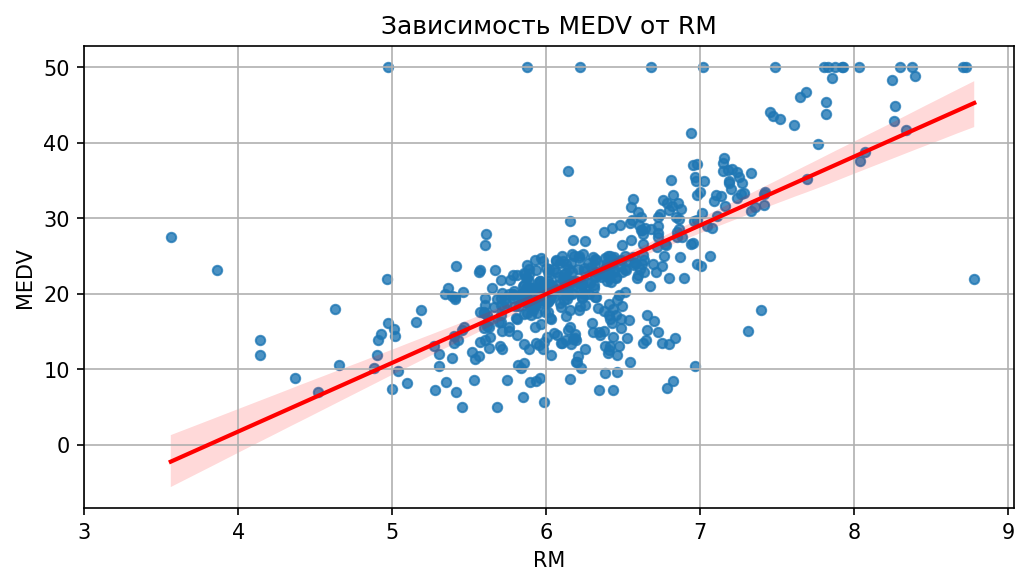

In [14]:
plt.figure(figsize=(8, 4), dpi=150) 
sns.regplot(data=DF, x='RM', y='MEDV',scatter_kws={'s':20},line_kws={'color':'red', 'lw':2}) 
plt.grid(True) 
plt.xticks(range(3, 10,1))  
plt.title("Зависимость MEDV от RM") 
plt.show()

**На графике видно,что:**
- большинство домов имеют от **5 до 7 комнат**
- есть выбросы : дома с **3-4 комнатами**,дом с **~9 комнатами**, но сильно заниженной ценой  

C:\Users\kiril\AppData\Local\Temp\ipykernel_24520\1125858525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=DF, x='RAD', y='TAX', palette='viridis', ax=ax[0])


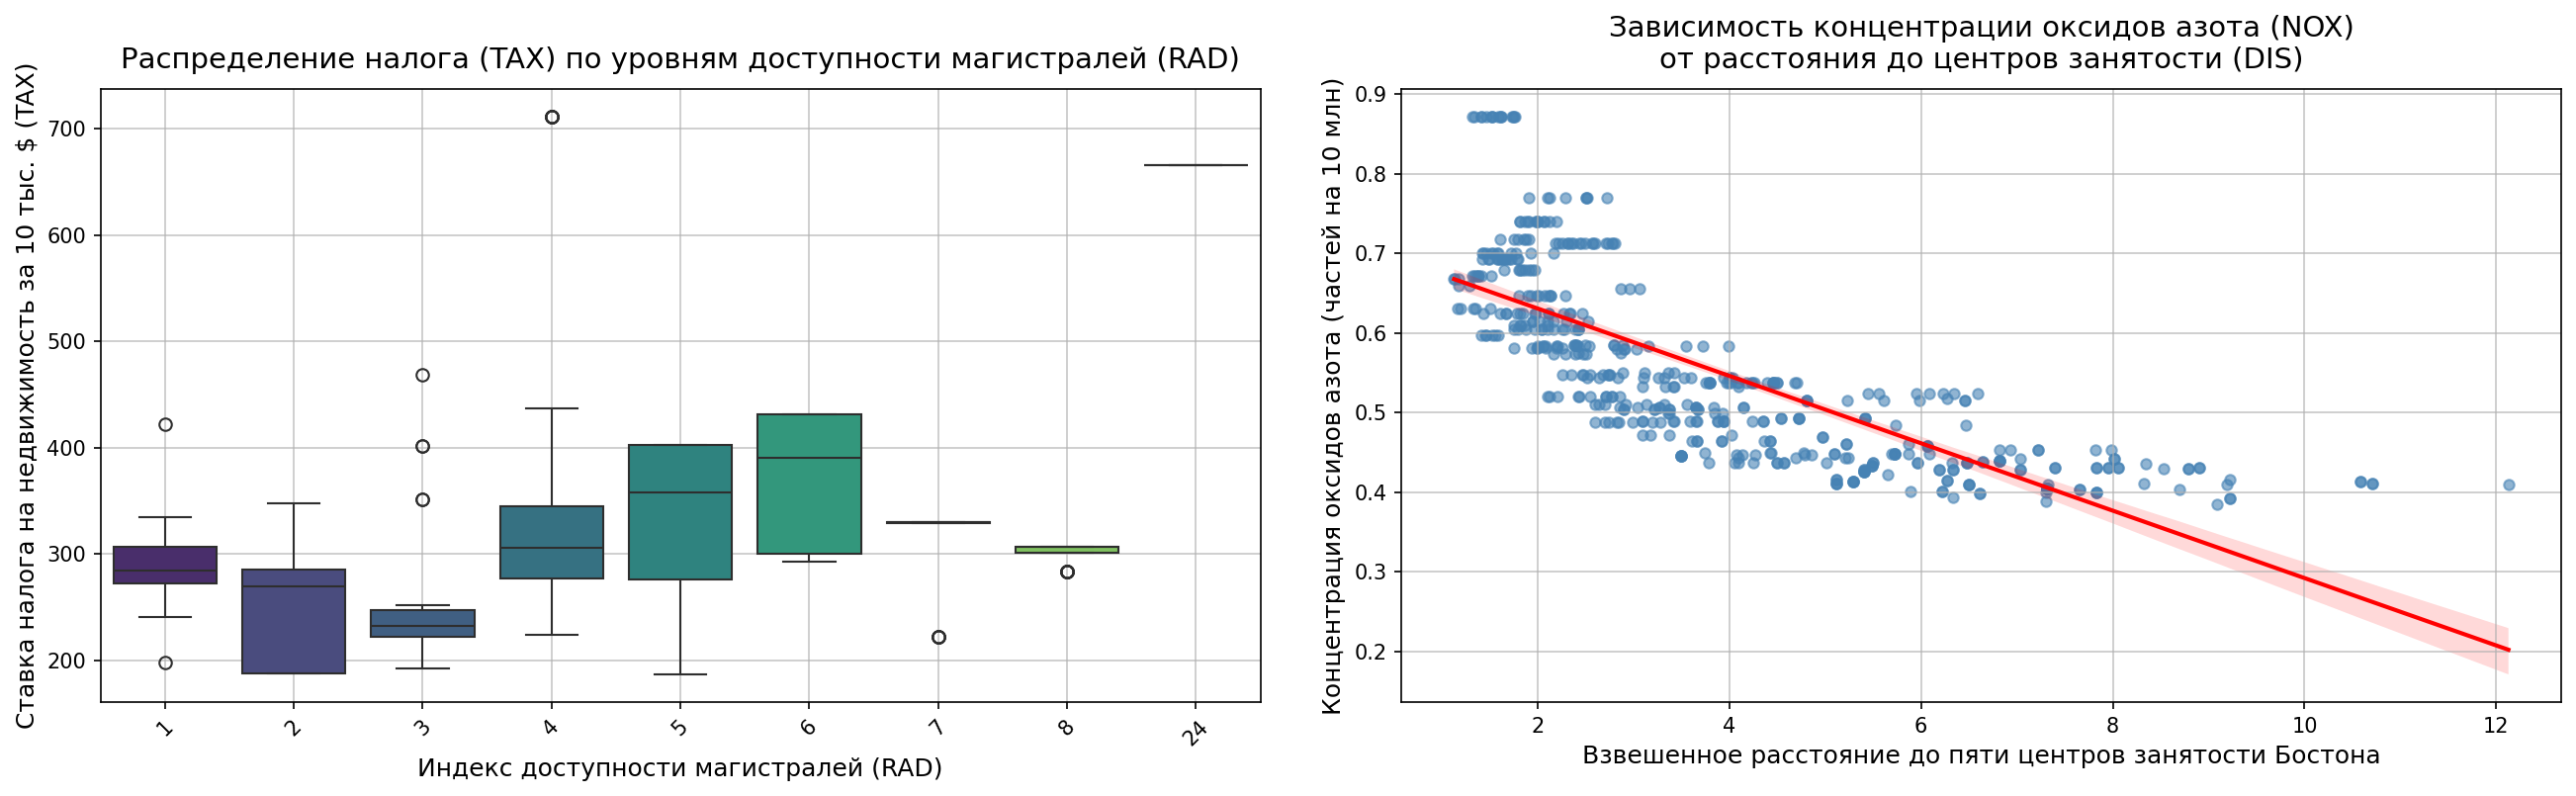

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=150)

sns.boxplot(data=DF, x='RAD', y='TAX', palette='viridis', ax=ax[0])
ax[0].set_title('Распределение налога (TAX) по уровням доступности магистралей (RAD)', fontsize=14, pad=10)
ax[0].set_xlabel('Индекс доступности магистралей (RAD)', fontsize=12)
ax[0].set_ylabel('Ставка налога на недвижимость за 10 тыс. $ (TAX)', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)  
ax[0].grid(True, alpha=0.7)  

sns.regplot(data=DF, x='DIS', y='NOX',scatter_kws={'alpha': 0.6, 's': 25, 'color': 'steelblue'},line_kws={'color': 'red', 'lw': 2},ax=ax[1])
ax[1].set_title('Зависимость концентрации оксидов азота (NOX)\nот расстояния до центров занятости (DIS)', fontsize=14, pad=10)
ax[1].set_xlabel('Взвешенное расстояние до пяти центров занятости Бостона', fontsize=12)
ax[1].set_ylabel('Концентрация оксидов азота (частей на 10 млн)', fontsize=12)
ax[1].grid(True, alpha=0.7)

plt.tight_layout(pad=3.0)  
plt.show()

**1) - TAX от RAD :**
- **1** - выбросы на **200** и на **~ 430**
- **3** - выбросы от **~ 360 - 480**
- **4** - выброс чуть выше **700**
- **5** - выброс на **~ 220**

**2) - NOX от DIS :**
-  чем дальше район от центра занятости - тем ниже концентрация азота
-  аномалии : - **NOX ~0.87** при **DIS <2**
              - **NOX ~0.41** при **DIS от 10 до 12** 

##  Итог по EDA: датасет 'Boston housing .csv'

---

### О данных

- В датасете **506 строк** и **14 столбцов**: 13 признаков + целевая переменная `MEDV` (средняя стоимость дома в тыс. долларов).
- Пропусков нет, дубликатов тоже не нашёл.

---

###  Основные наблюдения

####  Целевая переменная `MEDV`
- Медианная цена — около **21 000$**.
- Большинство домов стоят в диапазоне **17–25 тыс. $**.
- Есть выбросы сверху — особенно значения **от 40 до 50 тыс. $**.
- Значения **выше 50 тыс. $** были искусственно ограничены (описано на *Kaggle*).

####  Сильные корреляции
| Признаки | Коэффициент | Что значит |
|--------|------------|-----------|
| `LSTAT` <-> `MEDV` | -0.71 | Чем выше процент "бедного" населения — тем ниже цена |
| `RM` <-> `MEDV` | +0.70 | Больше комнат → выше цена |
| `TAX` <-> `RAD` | +0.91 | Высокие налоги и доступность магистралей идут рука об руку |
| `NOX` <->`INDUS` | +0.76 | Промышленные районы = больше загрязнения |
| `NOX` <-> `DIS` | -0.77 | Дальше от центра — чище воздух |

#### Выбросы
- Много в `CRIM`, `ZN`, `LSTAT`, `RM`, `MEDV`.
- Особенно `MEDV > 40` — вероятно, это не аномалии, а особенность данных (например, элитные районы или обрезанные значения).
- `CHAS` (река) — бинарный признак, влияет слабо, но интуитивно понятно: рядом с рекой — дороже.

---

###  Главные факторы, влияющие на цену
На основе корреляций и графиков:
1. **`RM`** — количество комнат (чем больше, тем дороже).
2. **`LSTAT`** — уровень "социально низкого статуса" (чем выше — тем дешевле).
3. **`PTRATIO`** — соотношение учеников и учителей (ниже — лучше школы → дороже жильё).
4. **`NOX`** — загрязнённость (выше — дешевле).

---
